In [16]:
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import time
from dateutil.relativedelta import relativedelta

%matplotlib inline
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.style.use('seaborn-paper')
import matplotlib.pyplot as plt

In [2]:
from causis_api.const import get_version
from causis_api.const import login

login.username = "yisen.du"
login.password = "Eason@20010917"
login.version = get_version()

from causis_api.data import *

all_instrument_china = all_instruments(type='R', date='None', market='cn')

In [3]:
pd.set_option('display.max_rows', None)
all_instrument_china

,Symbol,Code,Name,BeginDate,EndDate,Type,Exchange,MinTick,Multiplier
0,R.CN.CFE.IC.0004,IC,IC连续合约,2015-04-16,2023-04-06,ROLL,None,None,None
1,R.CN.CFE.IF.0004,IF,IF连续合约,2010-04-16,2023-04-06,ROLL,None,None,None
2,R.CN.CFE.IH.0004,IH,IH连续合约,2015-04-16,2023-04-06,ROLL,None,None,None
3,R.CN.CFE.IM.0004,IM,IM连续合约,2022-07-22,2023-04-06,ROLL,None,None,None
4,R.CN.CFE.T.0004,T,T连续合约,2015-03-20,2023-04-06,ROLL,None,None,None
5,R.CN.CFE.TF.0004,TF,TF连续合约,2013-09-06,2023-04-06,ROLL,None,None,None
6,R.CN.CFE.TS.0004,TS,TS连续合约,2018-08-17,2023-04-06,ROLL,None,None,None
7,R.CN.CZC.AP.0004,AP,苹果连续合约,2017-12-22,2023-04-06,ROLL,None,None,None
8,R.CN.CZC.CF.0004,CF,郑棉连续合约,2004-06-01,2023-04-06,ROLL,None,None,None
9,R.CN.CZC.CJ.0004,CJ,红枣连续合约,2019-04-17,2023-04-06,ROLL,None,None,None


In [36]:
# R.CN.CZC.CF.0004
pd.set_option('display.max_rows', 10)
df = get_price("R.CN.CZC.CF.0004", "2005-02-21", end_date=None, frequency='day', fields=None, adjust_type=None, skip_suspended =False, market='cn', expect_df=False)
df

,SYMBOL,CLOCK,OPEN,HIGH,LOW,CLOSE,VOLUME,INTEREST,SETTLE,ADJ
0,R.CN.CZC.CF.0004,2005-02-21,13000.0,13325.0,13000.0,13180.0,6168.0,6324.0,13230.0,1.000000
1,R.CN.CZC.CF.0004,2005-02-22,13555.0,13575.0,13400.0,13405.0,0.0,27184.0,13405.0,0.983215
2,R.CN.CZC.CF.0004,2005-02-23,13555.0,13575.0,13400.0,13405.0,0.0,27184.0,13405.0,0.983215
3,R.CN.CZC.CF.0004,2005-02-24,13555.0,13575.0,13400.0,13405.0,0.0,27184.0,13405.0,0.983215
4,R.CN.CZC.CF.0004,2005-02-25,13555.0,13575.0,13400.0,13405.0,0.0,27184.0,13405.0,0.983215
...,...,...,...,...,...,...,...,...,...,...
4402,R.CN.CZC.CF.0004,2023-03-28,13980.0,14225.0,13965.0,14205.0,418530.0,477873.0,14135.0,0.545031
4403,R.CN.CZC.CF.0004,2023-03-29,14210.0,14485.0,14210.0,14380.0,445773.0,443592.0,14355.0,0.545031
4404,R.CN.CZC.CF.0004,2023-03-30,14445.0,14450.0,14255.0,14325.0,300927.0,433212.0,14335.0,0.545031
4405,R.CN.CZC.CF.0004,2023-03-31,14355.0,14370.0,14265.0,14325.0,234539.0,421134.0,14320.0,0.545031


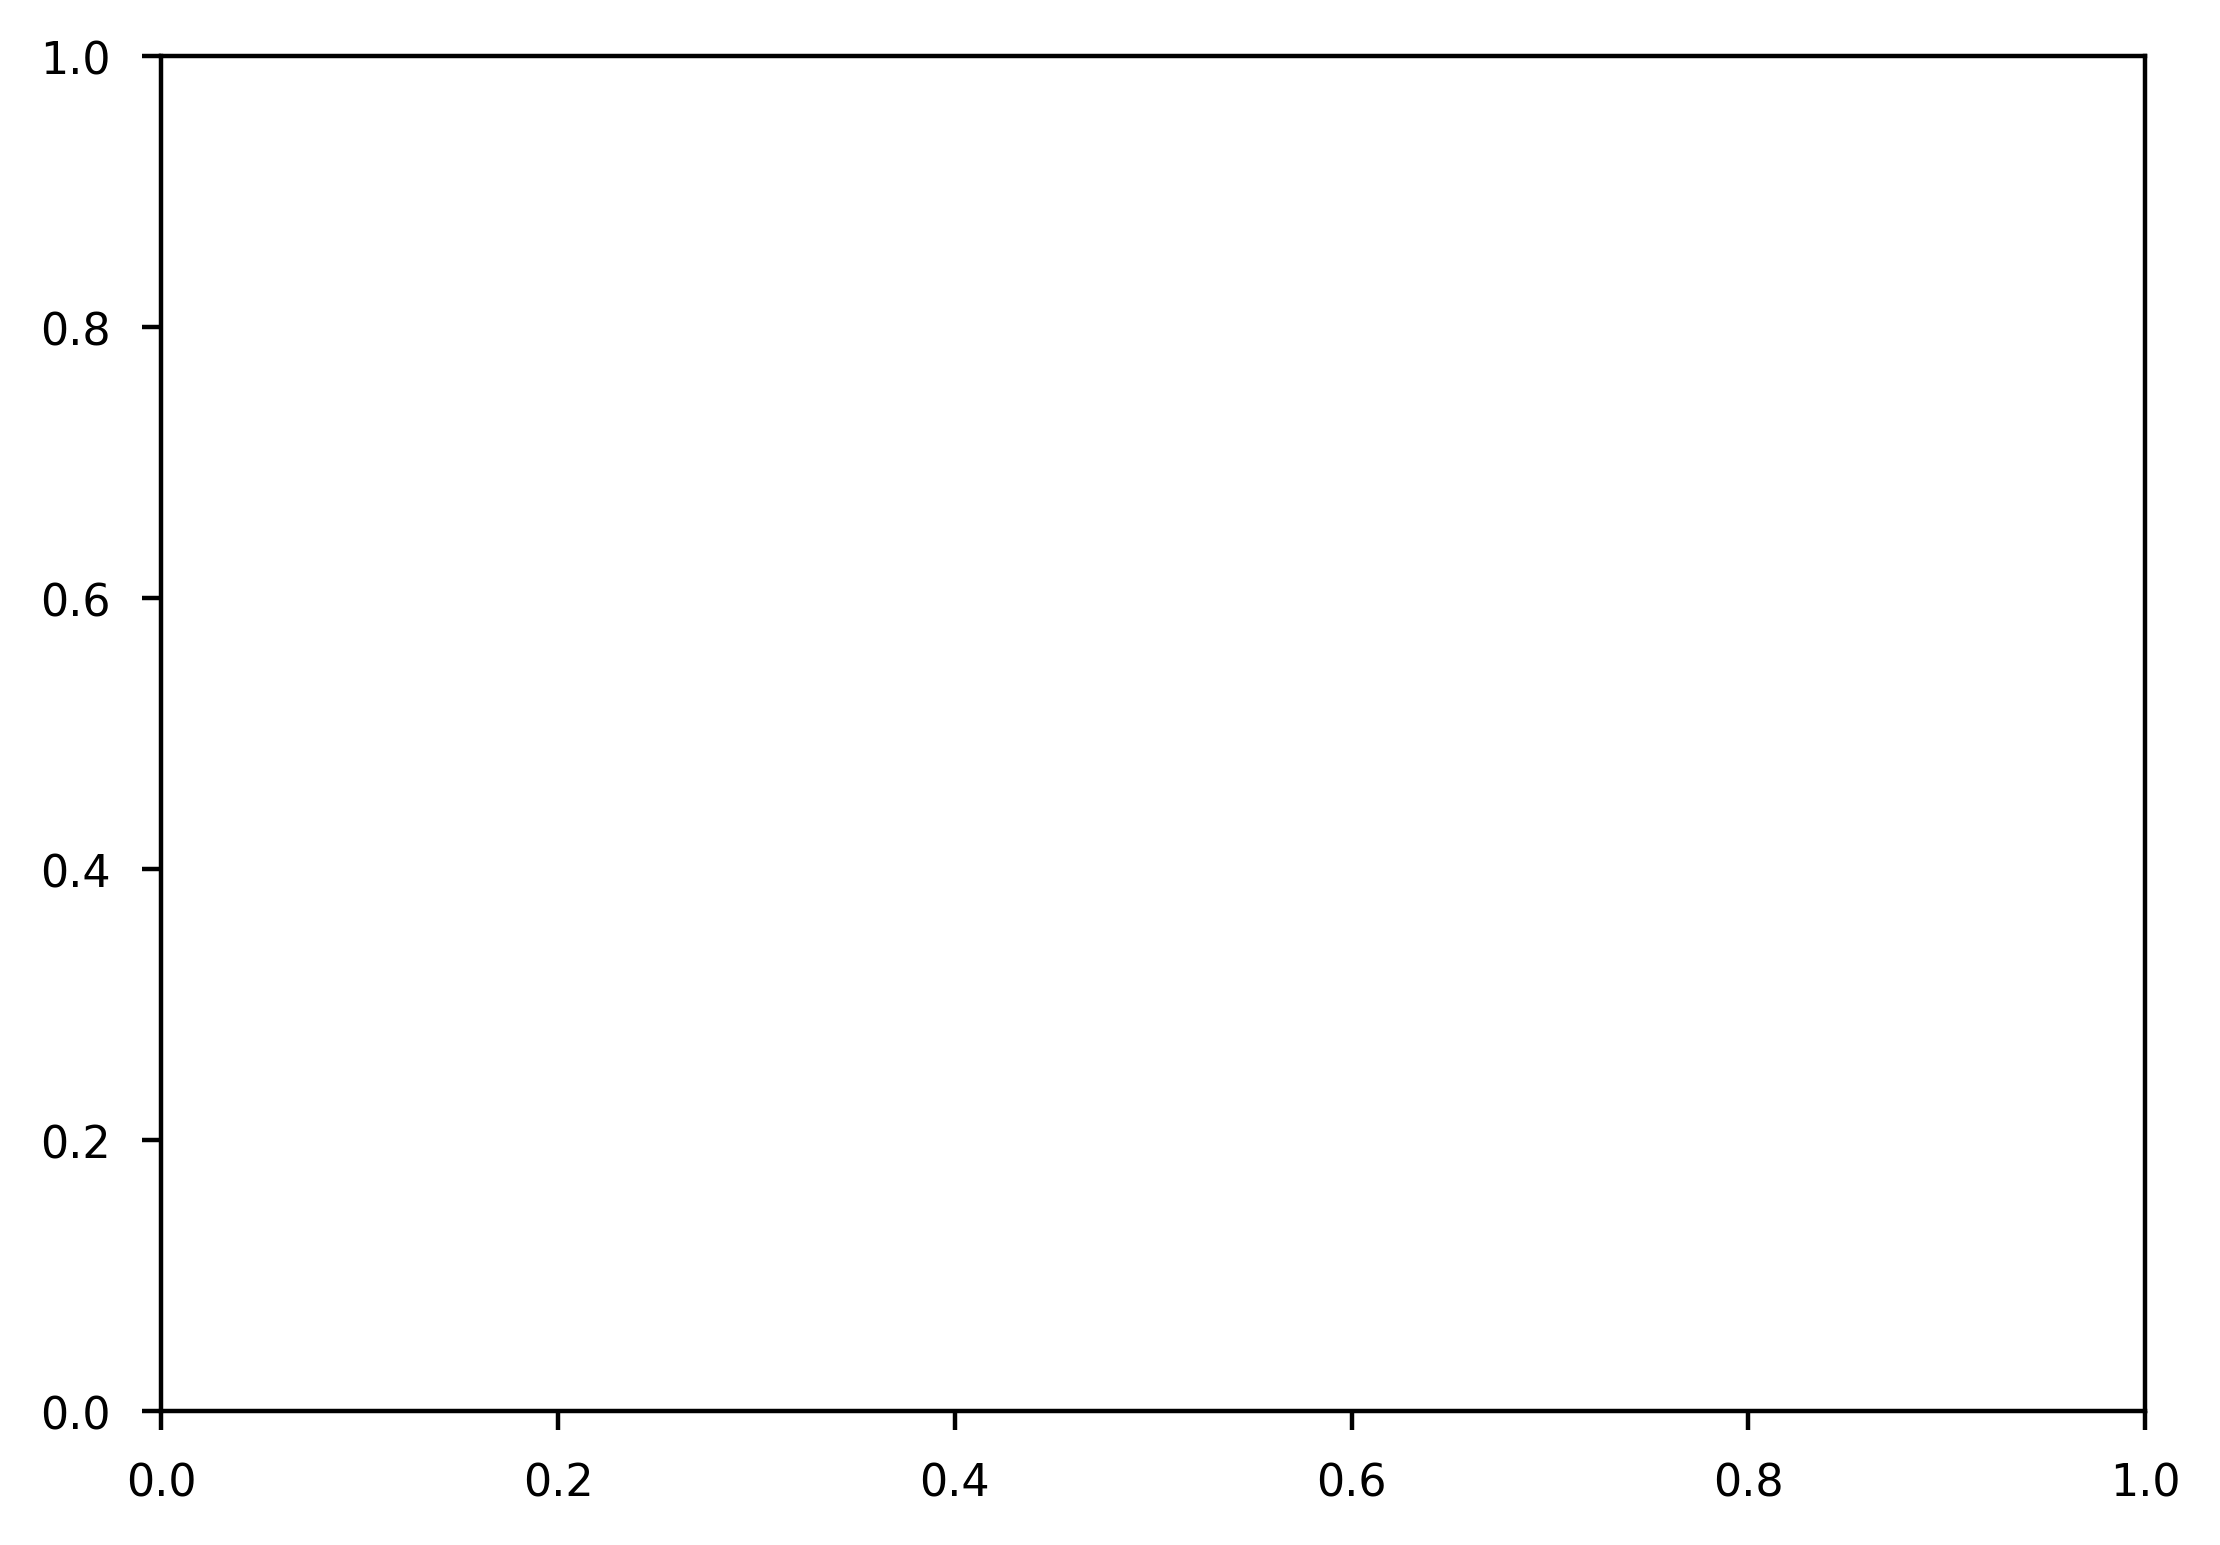

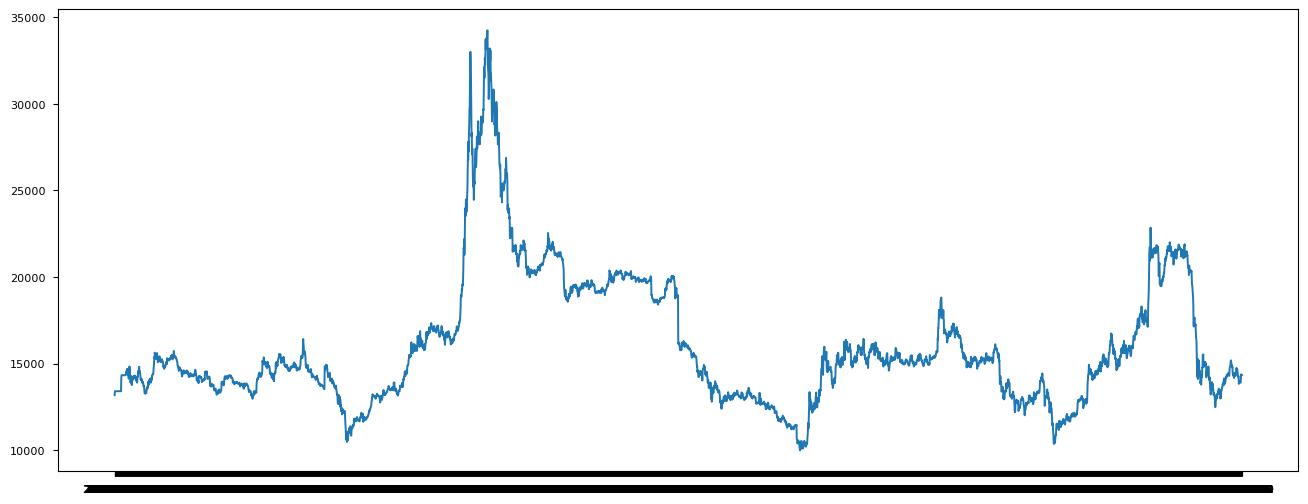

In [39]:
# draw a histogram of number of transactions
fig, ax = plt.subplots(dpi=400)

plt.figure(figsize=(16,6))

plt.plot(df.CLOCK, df.CLOSE)

# plt.xlabel("Number of logs")
# plt.ylabel("Count")

# plt.title('Histogram: number of logs per merchant')

plt.show()

In [9]:
df.CLOCK.iloc[0]

'2010-01-04'

In [40]:
pd.set_option('display.max_rows', 10)
df_dominant = get_dominant_contracts("R.CN.CZC.CF.0004","2005-02-21",end_date=None)
# df_dominant['ProductCode'].drop_duplicates()
df_dominant

,Date,ProductCode
0,20050221,F.CN.CZC.CF.CF0503
1,20050222,F.CN.CZC.CF.CF0505
2,20050223,F.CN.CZC.CF.CF0505
3,20050224,F.CN.CZC.CF.CF0505
4,20050225,F.CN.CZC.CF.CF0505
...,...,...
6611,20230330,F.CN.CZC.CF.CF2305
6612,20230331,F.CN.CZC.CF.CF2305
6613,20230401,F.CN.CZC.CF.CF2305
6614,20230402,F.CN.CZC.CF.CF2305


In [11]:
# 获取商品期货品种基本面数据指标
pd.set_option('display.max_rows', None)
get_fundamental_index(ProductCode="F.CN.CZC.CF")

,VariCode,Symbol,Category
0,F.CN.CZC.CF,中国棉花价格指数:3128B,现货价格
1,F.CN.CZC.CF,纺企棉花库存,库存
2,F.CN.CZC.CF,棉花最低交割价,现货价格
3,F.CN.CZC.CF,进口棉利润,利润
4,F.CN.CZC.CF,花纱价差,现货价格
5,F.CN.CZC.CF,花纱价差,利润
6,F.CN.CZC.CF,纺企棉纱库存,库存
7,F.CN.CZC.CF,全国棉花累计检验量|DZ,生产状况
8,F.CN.CZC.CF,下游喷水周度开机率|DZ,生产状况
9,F.CN.CZC.CF,下游圆机周度开机率|DZ,生产状况


In [50]:
# 获取商品期货品种基本面指标在一段时间内的值
pd.set_option('display.max_rows', 10)
get_symbol_value('棉花-库存因子', "2005-02-21")

,Symbol,SymbolDate,UpdateDate,DelayDate,SymbolVal,Tag,ValStr
0,棉花-库存因子,2020-02-12,2022-03-10,None,0.317460,None,None
1,棉花-库存因子,2020-02-19,2022-03-10,None,0.634921,None,None
2,棉花-库存因子,2020-02-20,2022-03-10,None,0.634921,None,None
3,棉花-库存因子,2020-03-04,2022-03-10,None,0.634921,None,None
4,棉花-库存因子,2020-03-19,2022-03-10,None,-0.634921,None,None
...,...,...,...,...,...,...,...
149,棉花-库存因子,2023-03-07,2023-03-07,None,-0.317460,None,None
150,棉花-库存因子,2023-03-14,2023-03-14,None,0.000000,None,None
151,棉花-库存因子,2023-03-21,2023-03-21,None,0.317460,None,None
152,棉花-库存因子,2023-03-28,2023-03-28,None,0.000000,None,None


In [ ]:
# 获取一段时间内外盘期货产品的分钟行情数据
get_external_min_bar("F.US.ICE.CT", "2010-01-01", end_date=None)

In [12]:
# 获取某一时间段的交易日期
get_trading_dates("2010-01-01", end_date=None,productCode= 'R.CN.CZC.CF.0004')

['2010-01-04',
 '2010-01-05',
 '2010-01-06',
 '2010-01-07',
 '2010-01-08',
 '2010-01-11',
 '2010-01-12',
 '2010-01-13',
 '2010-01-14',
 '2010-01-15',
 '2010-01-18',
 '2010-01-19',
 '2010-01-20',
 '2010-01-21',
 '2010-01-22',
 '2010-01-25',
 '2010-01-26',
 '2010-01-27',
 '2010-01-28',
 '2010-01-29',
 '2010-02-01',
 '2010-02-02',
 '2010-02-03',
 '2010-02-04',
 '2010-02-05',
 '2010-02-08',
 '2010-02-09',
 '2010-02-10',
 '2010-02-11',
 '2010-02-12',
 '2010-02-22',
 '2010-02-23',
 '2010-02-24',
 '2010-02-25',
 '2010-02-26',
 '2010-03-01',
 '2010-03-02',
 '2010-03-03',
 '2010-03-04',
 '2010-03-05',
 '2010-03-08',
 '2010-03-09',
 '2010-03-10',
 '2010-03-11',
 '2010-03-12',
 '2010-03-15',
 '2010-03-16',
 '2010-03-17',
 '2010-03-18',
 '2010-03-19',
 '2010-03-22',
 '2010-03-23',
 '2010-03-24',
 '2010-03-25',
 '2010-03-26',
 '2010-03-29',
 '2010-03-30',
 '2010-03-31',
 '2010-04-01',
 '2010-04-02',
 '2010-04-06',
 '2010-04-07',
 '2010-04-08',
 '2010-04-09',
 '2010-04-12',
 '2010-04-13',
 '2010-04-

all_instrument_china